In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install pandas numpy scipy matplotlib seaborn scikit-learn fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.3 MB/s eta 0:00:00


# Introdução à Regressão Linear

A **Regressão Linear** é um dos algoritmos fundamentais da Ciência de Dados.
Seu objetivo principal é modelar a relação entre uma variável dependente (alvo/target) e uma ou mais variáveis independentes (preditores/features).

No contexto deste projeto, estamos tentando prever a **potência total gerada (`Powerall`)** por fazendas de conversores de energia das ondas (WECs) com base em suas coordenadas geográficas e métricas de distância entre os dispositivos.

### O Modelo Matemático

A forma mais simples da regressão linear segue a equação de uma reta:

$y = \beta_0 + \beta_1 x + \epsilon$

Onde:

-   $y$: Variável que queremos prever.

-   $\beta_0$: O intercepto (onde a reta corta o eixo Y).

-   $\beta_1$: O coeficiente angular (o "peso" de cada variável).

-   $\epsilon$: O erro ou ruído aleatório.

------------------------------------------------------------------------

## Metodologia Aplicada

### Segmentação por Cenários

Dados de energia renovável costumam variar drasticamente dependendo da localização geográfica (Cenários).
Em vez de um modelo único, foram aplicadas **quatro regressões independentes**, permitindo que o algoritmo aprenda as características físicas específicas de cada mar (Sydney, Adelaide, Perth e Tasmania).

### Transformação Logarítmica

Notamos que a variável alvo apresenta grande amplitude e variância.
Aplicamos a transformação `log1p` ($log(1+x)$) para:

1.  **Normalizar a distribuição** dos dados.

2.  **Reduzir o impacto de outliers**, tornando a relação entre as variáveis mais linear.

## Análise de Métricas de Avaliação

Para nivelamento, utilizamos três métricas principais para julgar se o modelo é bom ou ruim:

1.  $R^2$ (Coeficiente de Determinação): Indica quanto da variação dos dados é explicada pelo modelo.
    Varia de 0 a 1 (ou 0% a 100%).
    Quanto maior, melhor.

2.  **MAE (Erro Médio Absoluto):** A média simples da distância entre o valor real e o previsto.
    É fácil de interpretar, pois está na mesma unidade da potência (Watts).

3.  **RMSE (Raiz do Erro Quadrático Médio):** Similar ao MAE, mas penaliza erros grandes com mais severidade.
    É ideal para identificar modelos que falham drasticamente em alguns pontos.

------------------------------------------------------------------------

# Implementação do Código

## Carregamento dos Dados

Nesta etapa os dados processados são carregados para análise.

In [5]:
import pandas as pd
from pathlib import Path

PROCESSED_DIR = Path("/content/drive/MyDrive/DL/P1_RL/data/processed")
file_path = PROCESSED_DIR / "wec_all_processed.parquet"

df = pd.read_parquet(file_path, engine="fastparquet")
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Powerall,scenario,dist_mean,dist_min,dist_max,dist_std,centroid_x,centroid_y,centroid_dist_mean,centroid_dist_std
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,1370374.145,Adelaide,318.669811,53.786210,696.706038,145.638849,298.557631,249.569931,216.708050,102.868349
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,1340929.765,Adelaide,316.501547,51.749881,614.241595,139.697244,206.533381,360.657137,229.015546,60.463932
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,1352031.511,Adelaide,346.026541,54.459406,699.690037,162.379271,349.369288,253.201200,242.446731,98.511988
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,1396754.375,Adelaide,331.598578,50.757900,784.156507,153.154218,255.486506,296.902162,227.486944,103.862523
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,1355708.577,Adelaide,328.617141,51.050694,671.244559,145.095922,280.733094,250.155525,232.300129,80.778165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287994,19.5135,478.6166,148.2143,450.2319,125.6785,70.9718,565.6854,37.7842,544.1133,236.7326,...,1402661.032,Perth,395.950144,51.044109,788.567767,196.024141,227.439375,324.371106,285.225481,100.734072
287995,333.6787,455.1773,432.5572,191.2960,556.6596,565.6854,76.3422,474.0408,133.7307,530.5940,...,1371938.375,Perth,360.631526,58.138436,753.786592,167.236248,363.023181,274.836112,258.320645,85.695706
287996,439.0799,281.9677,124.0780,403.3259,263.5955,67.5702,469.8106,97.9994,302.2266,210.1420,...,1344431.112,Perth,274.589655,53.280948,572.032256,124.818586,244.314731,254.888894,194.207024,70.214758
287997,36.1101,457.2237,359.1680,34.9338,543.2708,565.6854,381.4169,409.9652,73.8620,239.3023,...,1392385.246,Perth,333.234232,51.325276,689.557190,154.816745,312.697875,353.237300,236.031832,87.042797


## Treinamento e Avaliação do Modelo

O código abaixo realiza o processo de treinamento e avaliação da regressão linear para cada cenário, além de gerar gráficos de dispersão para visualizar a relação entre os valores reais e previstos.

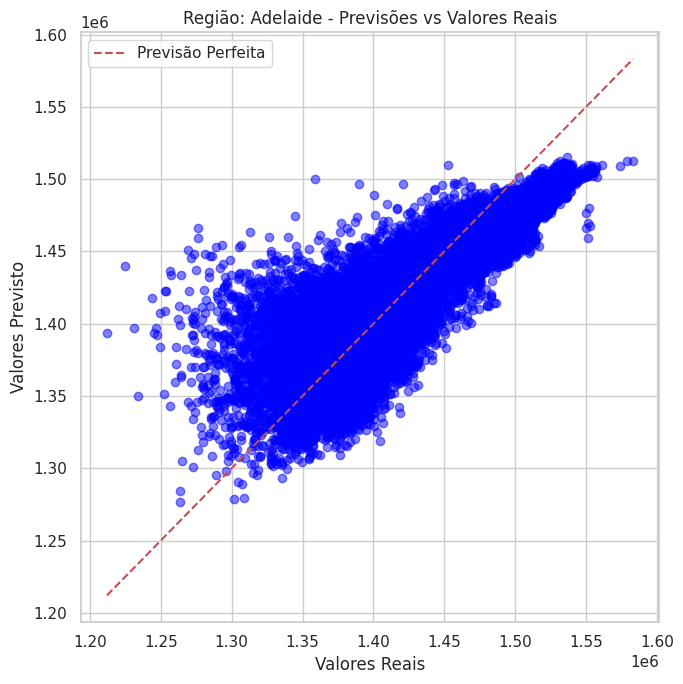

Região: Adelaide   | R²: 0.6452 | RMSE: 33446.52 | MAE: 25673.17


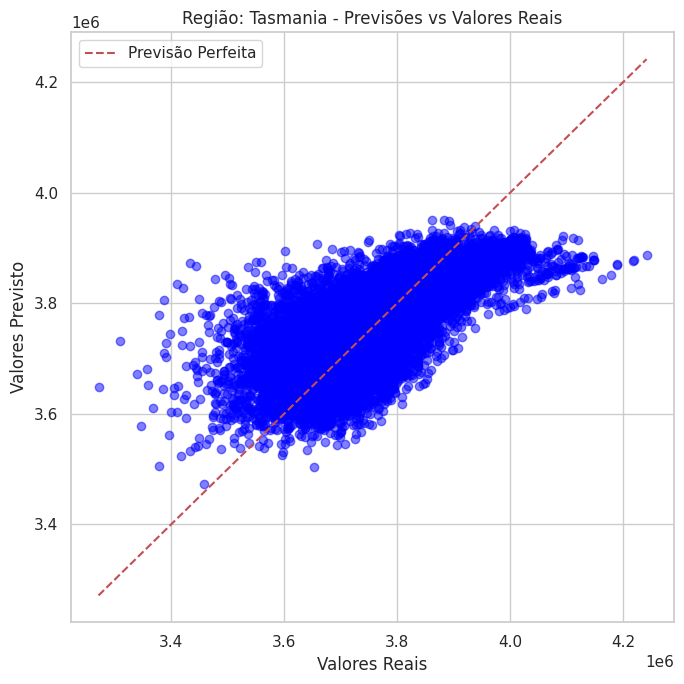

Região: Tasmania   | R²: 0.4941 | RMSE: 79537.57 | MAE: 60939.79


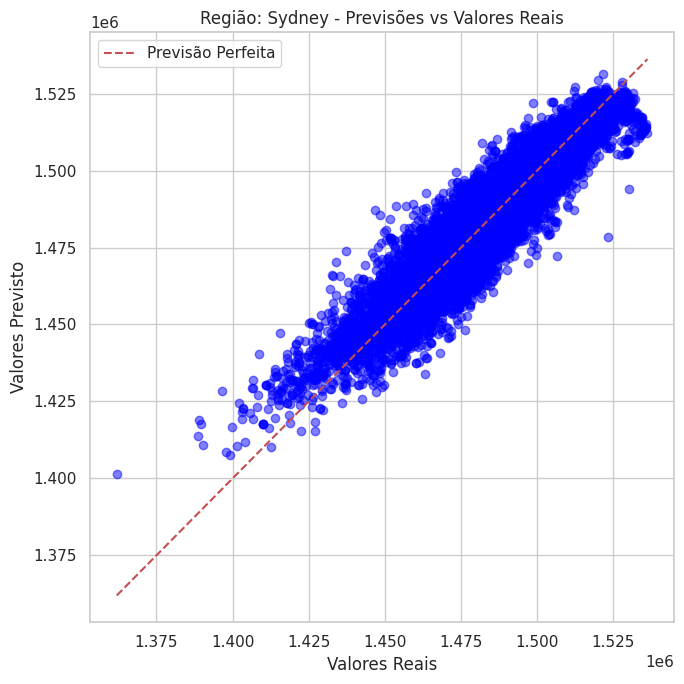

Região: Sydney     | R²: 0.8923 | RMSE: 7569.66 | MAE: 5823.09


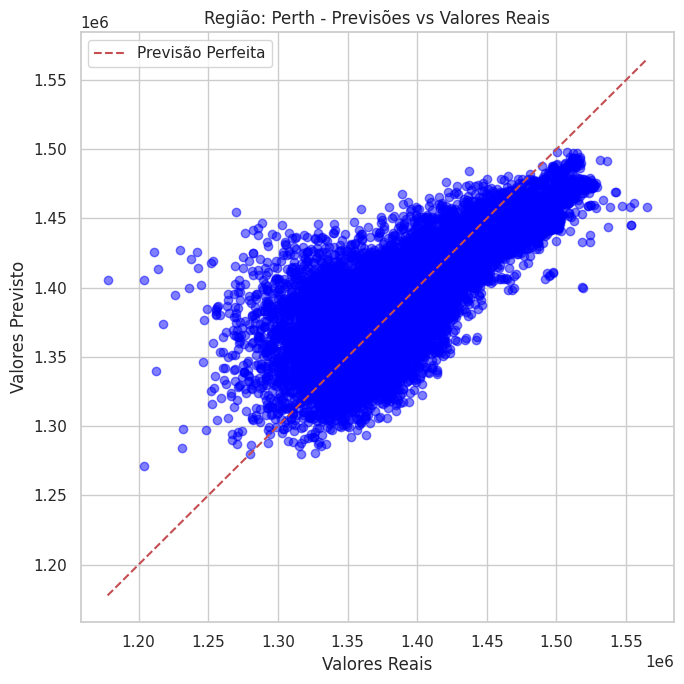

Região: Perth      | R²: 0.5918 | RMSE: 33101.26 | MAE: 25321.64

--- Resumo Final ---
                R2          RMSE           MAE
Sydney    0.892302   7569.658406   5823.092351
Adelaide  0.645156  33446.517078  25673.167580
Perth     0.591783  33101.263285  25321.635187
Tasmania  0.494148  79537.568248  60939.788113
Resumo Estatístico da Vaiável Target
count    2.879990e+05
mean     2.012730e+06
std      1.011813e+06
min      1.177711e+06
25%      1.395535e+06
50%      1.472576e+06
75%      2.409092e+06
max      4.241838e+06
Name: Powerall, dtype: float64


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

cenarios = df['scenario'].unique()
resultados = {}

for local in cenarios:
    df_region = df[df['scenario'] == local]

    X = df_region.drop(columns=['Powerall', 'scenario'])
    y = df_region['Powerall']

    y_log = np.log1p(y)

    X_train, X_test, y_train_log, y_test_log = train_test_split(
        X, y_log, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train_log)

    y_pred_log = model.predict(X_test)

    y_pred = np.expm1(y_pred_log)
    y_test = np.expm1(y_test_log)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    sns.set(style="whitegrid")

    plt.figure(figsize=(7, 7));
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue');
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Previsão Perfeita');
    plt.xlabel("Valores Reais");
    plt.ylabel("Valores Previsto");
    plt.title(f"Região: {local} - Previsões vs Valores Reais");
    plt.legend();
    plt.tight_layout();
    plt.show();

    resultados[local] = {'R2': r2, 'RMSE': rmse, 'MAE': mae}
    print(f"Região: {local:10} | R²: {r2:.4f} | RMSE: {rmse:.2f} | MAE: {mae:.2f}")

df_resultados = pd.DataFrame(resultados).T.sort_values(by='R2', ascending=False)
print("\n--- Resumo Final ---")
print(df_resultados)
print(f"Resumo Estatístico da Vaiável Target\n{df['Powerall'].describe()}")

# Conclusões do Projeto

Com base nas **Análises Finais**, observamos comportamentos distintos:

-   **Sydney** apresentou o melhor ajuste ($R^2 \approx 0.89$), indicando que a disposição física dos WECs nesta região tem uma correlação linear muito forte com a energia produzida.

-   **Tasmania** representou o maior desafio ($R^2 \approx 0.49$).
    Isso sugere que, em mares de alta energia, a relação entre as variáveis é provavelmente **não-linear**, exigindo modelos mais complexos no futuro, como polinômios ou redes neurais.

## Resumo das Métricas Obtidas

Abaixo, a consolidação dos resultados que demonstram a variação de precisão conforme a complexidade do cenário:

| Região | R² (Precisão) | Interpretação Técnica |
|:-----------------------|:-----------------------|:-----------------------|
| **Sydney** | 0.8923 | Alta Linearidade - Modelo Confiável |
| **Adelaide** | 0.6451 | Linearidade Moderada - Perda de padrão físico |
| **Perth** | 0.5917 | Linearidade Baixa - Necessita de termos complexos |
| **Tasmania** | 0.4941 | Não-Linear - Regressão Linear é insuficiente |

# Aprofundamento Teórico: O Limite da Linearidade em WECs

A Regressão Linear assume que a relação entre as variáveis de entrada ($X$) e a saída ($Y$) segue uma linha reta.
No entanto, o comportamento físico de um Wave Energy Converter (WEC) é intrinsecamente **não-linear**.

## Por que a Regressão Linear falha em cenários como a Tasmania?

O desempenho inferior observado em regiões de alta energia (como a Tasmania, com $R^2 \approx 0.49$) ocorre devido a três fenômenos principais que uma reta não consegue descrever:

### 1. Interação Hidrodinâmica (Efeito de Sombreamento)

Em uma fazenda de ondas, um WEC posicionado à frente de outro altera o campo de ondas para os dispositivos que estão atrás.

\* **O Problema:** Essa "perda" de energia não é constante; ela varia de forma exponencial ou senoidal dependendo da frequência e altura da onda.

\* **A Falha:** A regressão linear tenta somar ou subtrair valores fixos para cada coordenada, ignorando que a posição de um WEC afeta o outro de forma multiplicativa ou complexa.

### 2. O Fenômeno de Ressonância

WECs são projetados para ressonar com frequências específicas de ondas para maximizar a captura de energia.

\* **O Problema:** A curva de captura de energia costuma ser em formato de "sino" (Distribuição Gaussiana).

\* **A Falha:** Uma regressão linear tenta passar uma linha reta através de uma curva.
Como resultado, ela erra drasticamente tanto no "pico" da curva (subestimando a potência) quanto nas "bordas" (superestimando-a).

### 3. Underfitting (Subajuste)

Quando usamos um modelo linear para dados curvos, ocorre o que chamamos de **Underfitting**.
O modelo é simples demais para captar a "nuance" dos dados.

\* No gráfico de Sydney, os pontos estão próximos da linha vermelha porque o mar lá é mais "comportado".

\* Na Tasmania, a dispersão dos pontos longe da linha de 45° é o sinal visual de que existem padrões (curvas) nos dados que o modelo ignorou completamente.

------------------------------------------------------------------------

## Propostas de Evolução

Para superar essas limitações em trabalhos futuros, existem dois caminhos principais:

1.  **Regressão Polinomial:** Introduz termos de potência (ex: $X_1^2$, $X_1 \cdot X_2$). Isso permite que a "linha reta" se curve, ajustando-se melhor aos dados de mares energéticos.
2.  **Modelos Baseados em Árvores (Random Forest/XGBoost):** Estes modelos não tentam traçar uma linha, mas sim dividir os dados em "caixas" de decisão. Eles são excelentes para captar as interações complexas entre as coordenadas X e Y que discutimos acima.

------------------------------------------------------------------------